# Decision Tree Model : Classfier

Decision Tree is a machine learning algorithm that acts like a flowchart that helps make decisions which can be used for both classification and regression tasks. It builds a tree-like structure by recursively splitting data based on features, aiming to create decision rules for predicting outcomes. At each node, the algorithm selects the feature that best separates the data. Decision Trees are interpretable, capturing complex decision-making logic. They're sensitive to data quality and can suffer from overfitting, addressed by techniques like pruning.

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Download data
df = yf.download("AAPL",start ='2019-12-31',end ='2023-12-30')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520805,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152664,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018692,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675293,108872000
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700


In [3]:
# Make the copy of the data. We will work on the copied data.
data = df.copy()

In [4]:
# Inspect the data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520805,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152664,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018692,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675293,108872000


In [5]:
# Check the shape of the data
data.shape

(1007, 6)

In [6]:
# Generate log returns
data['returns'] = np.log(data['Close'] / data['Close'].shift(1))

If the next day is up day, we will designate it with 1, else if it is a down day, we will mark it with -1.

In [7]:
# Create target values
data['target'] = np.where(data.returns.shift(-1) > 0, 1, 0)

In [8]:
# Count the values in the target column
data['target'].value_counts()

1    528
0    479
Name: target, dtype: int64

In [9]:
# Creating features
features_list = []

# SD based features
for i in range(5, 20, 5):
    col_name = 'std_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).std()
    features_list.append(col_name)
    
# MA based features
for i in range(10, 30, 5):
    col_name = 'ma_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).mean()
    features_list.append(col_name)
    
# Daily pct change based features
for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    data[col_name] = data['Close'].pct_change().rolling(i).sum()
    features_list.append(col_name)
    
# Feature based on volume
col_name = 'vma_4'
data[col_name] = data['Volume'].rolling(4).mean()
features_list.append(col_name)

# Intraday movement
col_name = 'co'
data[col_name] = data['Close'] - data['Open']
features_list.append(col_name)

# Exponential Moving Averages
for i in range(5, 21, 5):
    col_name = 'ema_' + str(i)
    data[col_name] = data['Close'].ewm(span=i, adjust=False).mean()
    features_list.append(col_name)

In [10]:
features_list

['std_5',
 'std_10',
 'std_15',
 'ma_10',
 'ma_15',
 'ma_20',
 'ma_25',
 'pct_3',
 'pct_6',
 'pct_9',
 'vma_4',
 'co',
 'ema_5',
 'ema_10',
 'ema_15',
 'ema_20']

In [11]:
# Removing nan values
data.dropna(inplace=True)

In [12]:
data[features_list + ['target']].head()

,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,ema_5,ema_10,ema_15,ema_20,target
Date,,,,,,,,,,,,,,,,,
2020-02-05,1.744018,1.495007,1.266561,79.271501,79.174001,78.790376,77.9285,0.038422,0.013566,0.009568,157205000.0,-0.517494,79.393871,79.144088,78.788289,78.376932,1
2020-02-06,1.836846,1.623766,1.320023,79.421001,79.405168,79.065625,78.2441,0.052865,0.004331,0.024147,133664300.0,0.659996,80.030080,79.536526,79.102565,78.655558,0
2020-02-07,1.543320,1.634032,1.317667,79.464001,79.485001,79.195625,78.4409,0.003923,-0.010148,0.037624,119638200.0,-0.584999,80.022553,79.622158,79.215682,78.784314,1
2020-02-10,0.598420,1.450435,1.337636,79.779000,79.532001,79.335875,78.6821,0.000518,0.038940,0.014085,112821300.0,1.842499,80.144201,79.761310,79.362159,78.936998,0
2020-02-11,0.551668,1.445260,1.336222,79.827000,79.582667,79.369000,78.8802,-0.017212,0.035653,-0.012881,106695400.0,-0.997505,80.063633,79.786981,79.429701,79.028950,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Splitting data into train and test
X_train , X_test, y_train, y_test = train_test_split(data[features_list].iloc[:-1],
                                                    data.iloc[:-1]['target'],
                                                    test_size= 0.25, 
                                                    shuffle=False)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((736, 16), (736,), (246, 16), (246,))

In [15]:
# Import necessary packages
from sklearn.tree import DecisionTreeClassifier

In [16]:
DecisionTreeClassifier?

In [17]:
# Create a model
model = DecisionTreeClassifier(max_depth=4, random_state=1)

In [18]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [19]:
# Predict on a train dataset
y_pred_train = model.predict(X_train)


In [20]:
print('Model accuracy on training data:', model.score(X_train, y_train))

Model accuracy on training data: 0.5964673913043478


In [21]:
# Predict on a test dataset
y_pred = model.predict(X_test)

In [22]:
print('Model accuracy on testing data:', model.score(X_test, y_test))

Model accuracy on testing data: 0.4634146341463415


In [23]:
# Another method to calculate accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy on training data:', accuracy_score(y_train, y_pred_train))
print('Model accuracy on testing data:', accuracy_score(y_test, y_pred))

Model accuracy on training data: 0.5964673913043478
Model accuracy on testing data: 0.4634146341463415


In [24]:
# Importing necessary packages
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
# Printing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 88  21]
 [111  26]]


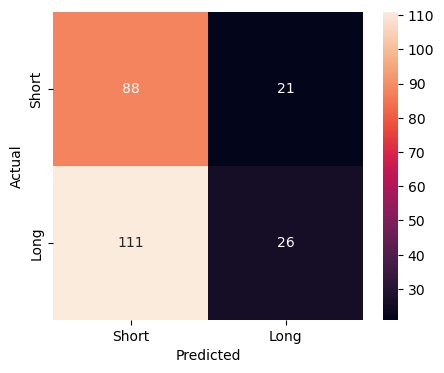

In [26]:
# Plotting the Confustion matrix
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm, index=['Short', 'Long'], columns=['Short', 'Long'])
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.81      0.57       109
           1       0.55      0.19      0.28       137

    accuracy                           0.46       246
   macro avg       0.50      0.50      0.43       246
weighted avg       0.50      0.46      0.41       246



In [28]:
from sklearn.tree import plot_tree

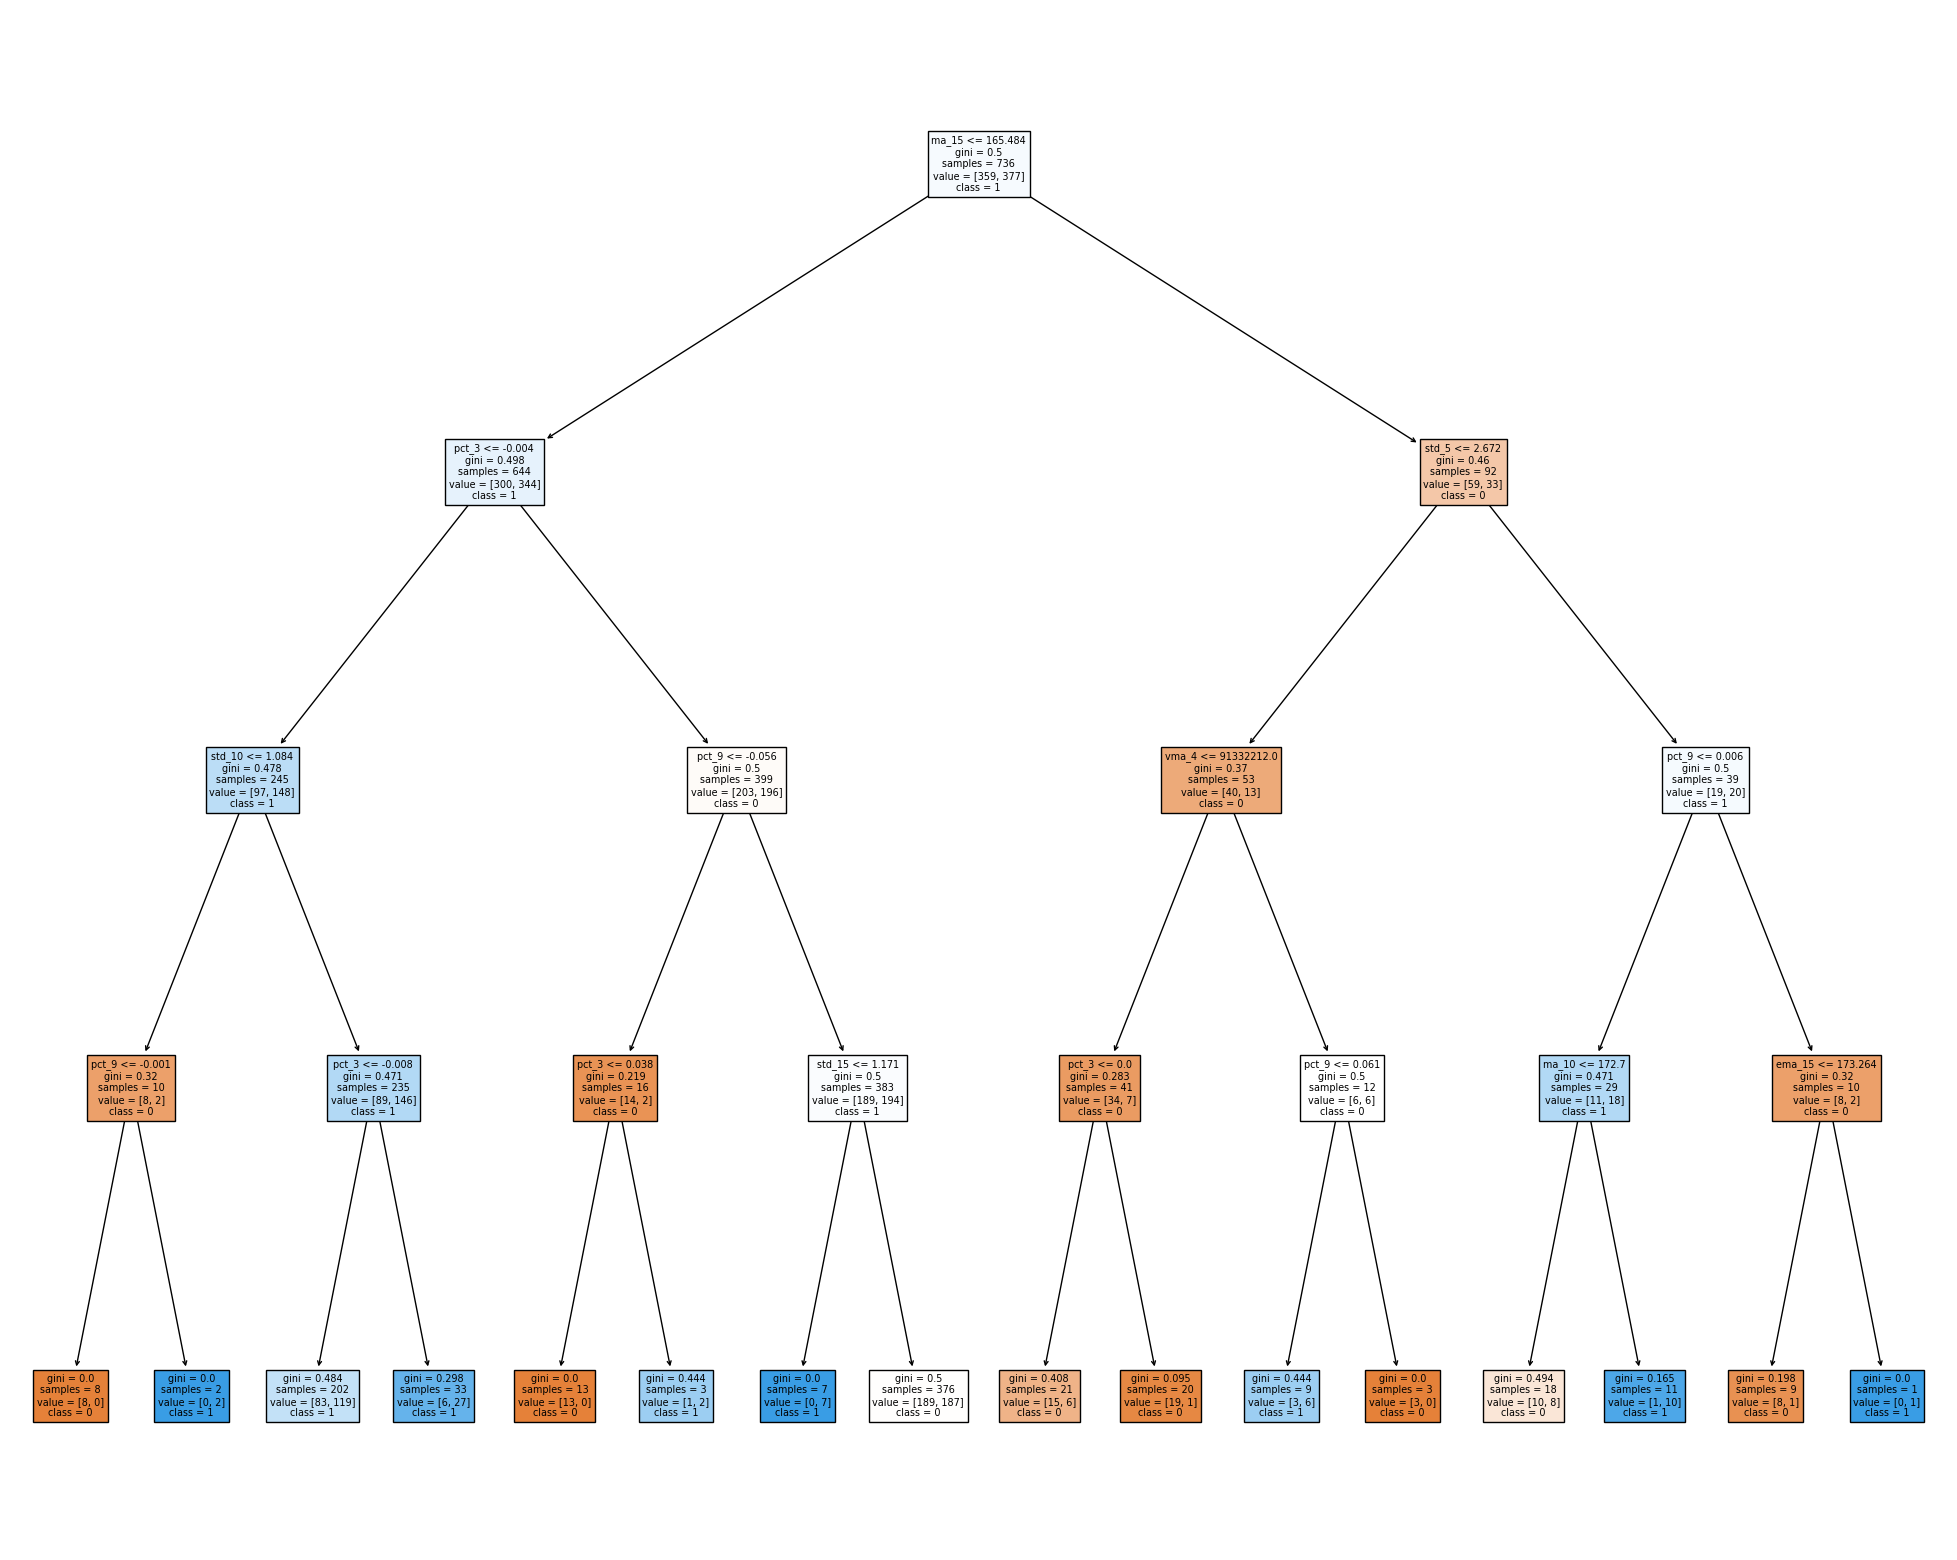

In [29]:
#Visualize the decesion tree
fig = plt.figure(figsize=(25,20))

_ = plot_tree(model, 
              feature_names=features_list,
              class_names=['0','1'],
              filled=True)

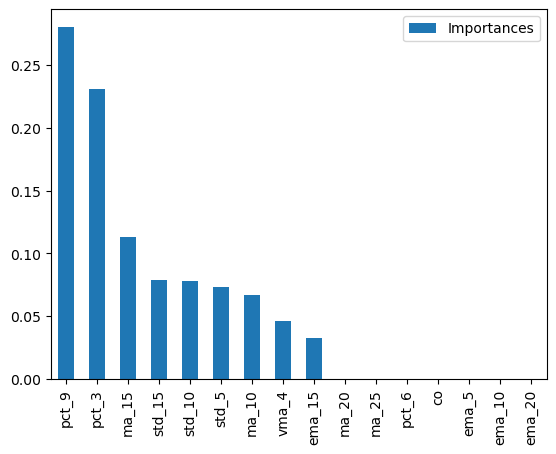

In [30]:
plot_df = pd.DataFrame({"Importances": model.feature_importances_}, index=features_list)
plot_df.sort_values('Importances', ascending=False).plot.bar();